In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('letter-recognition.data', sep = ',')
df

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.iloc[:, 1 : 17]
y = df.select_dtypes(include = [object])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

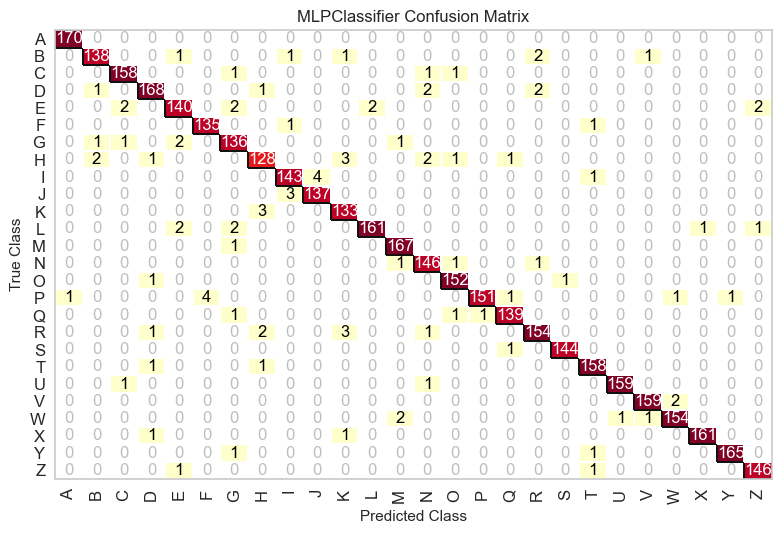

In [ ]:
from yellowbrick.classifier import confusion_matrix
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

cm = confusion_matrix(mlp, x_train_scaled, y_train.values.ravel(), x_test_scaled, y_test.values.ravel(), 
                      classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [ ]:
from sklearn.metrics import accuracy_score

cm.fit(x_train_scaled, y_train.values.ravel())
cm.score(x_test_scaled, y_test)

y_pred = cm.predict(x_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))